In [18]:
import keras
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [ ]:
keras.backend.clear_session()
X_train[0]

label 5


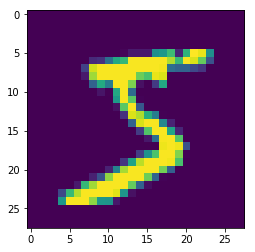

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

#display the first image in the mnist dataset
plt.imshow(X_train[0])
print("label", y_train[0])

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
from keras.utils import to_categorical
#Apply one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#Add layers into the model
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
#Compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train of the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

In [ ]:
#Predict first 4 images in the test set
model.predict(X_test[:4])

In [ ]:
#Actual results for first 4 images in test set
y_test[:4]

In [ ]:
#Save the model as mnist.h5
model.save("models/mnist.h5")

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 197   0 ...   0 196 255]
 [255 164   0 ...   0 164 255]
 [255 235 164 ... 164 235 255]]
(1, 28, 28, 1)


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.2797541e-26, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

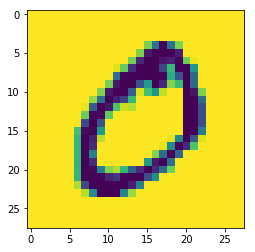

In [14]:
from keras.models import load_model
import cv2
import numpy as np
img = cv2.imread("models/0.jpg", cv2.IMREAD_GRAYSCALE)
print(img)
img = cv2.resize(img, dsize=(28,28))
plt.imshow(img)
img = np.expand_dims(img, axis=2)
img = img.reshape(1,28,28,1)
print(img.shape)

In [ ]:
#Import the saved model and test if it is reusable
model = load_model("models/mnist.h5")
model.predict(img)